## PsychoPy data

### [1] Import & Preprocess

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import processor as pr

In [2]:
# read in the data
psychopy_data = pd.read_csv("py_data_test.csv")

In [3]:
# reduce data & add the previous accuracy
psychopy_data = pr.psypy_reduce(psychopy_data)

### [2] Get RT of 9 conditions

In [4]:
# not allow error in the current trial
cC_NoE, cC_RT_NoE = pr.get_RT(psychopy_data, 'cC')
cN_NoE, cN_RT_NoE = pr.get_RT(psychopy_data, 'cN')
cI_NoE, cI_RT_NoE = pr.get_RT(psychopy_data, 'cI')
nC_NoE, nC_RT_NoE = pr.get_RT(psychopy_data, 'nC')
nN_NoE, nN_RT_NoE = pr.get_RT(psychopy_data, 'nN')
nI_NoE, nI_RT_NoE = pr.get_RT(psychopy_data, 'nI')
iC_NoE, iC_RT_NoE = pr.get_RT(psychopy_data, 'iC')
iN_NoE, iN_RT_NoE = pr.get_RT(psychopy_data, 'iN')
iI_NoE, iI_RT_NoE = pr.get_RT(psychopy_data, 'iI')

# allow error in the current trial
cC_NoE, cC_RT_NoE = pr.get_RT(psychopy_data, 'cC', 'True')
cN_NoE, cN_RT_NoE = pr.get_RT(psychopy_data, 'cN', 'True')
cI_NoE, cI_RT_NoE = pr.get_RT(psychopy_data, 'cI', 'True')
nC_NoE, nC_RT_NoE = pr.get_RT(psychopy_data, 'nC', 'True')
nN_NoE, nN_RT_NoE = pr.get_RT(psychopy_data, 'nN', 'True')
nI_NoE, nI_RT_NoE = pr.get_RT(psychopy_data, 'nI', 'True')
iC_NoE, iC_RT_NoE = pr.get_RT(psychopy_data, 'iC', 'True')
iN_NoE, iN_RT_NoE = pr.get_RT(psychopy_data, 'iN', 'True')
iI_NoE, iI_RT_NoE = pr.get_RT(psychopy_data, 'iI', 'True')

### [3] Compute Sn & Label Median distance & Outlier

In [5]:
psychopy_data, sn_all, sn_all_all = pr.compute_sn_all(psychopy_data)

/Users/guanruijia/Desktop/RA/UMich/AAC lab/processor.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['median_distance'][i] = 'Invalid'
/Users/guanruijia/Desktop/RA/UMich/AAC lab/processor.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['median_distance_all'][i] = 'Invalid'


In [6]:
print(sn_all)
print(sn_all_all)

{'cC': 69.0, 'cN': 90.0, 'cI': 84.0, 'nC': 52.0, 'nN': 83.65834633385336, 'nI': 72.0, 'iC': 54.69329529243938, 'iN': 117.0, 'iI': 54.0}
{'cC': 69.0, 'cN': 89.66960352422909, 'cI': 84.0, 'nC': 52.0, 'nN': 81.0, 'nI': 72.0, 'iC': 54.69329529243938, 'iN': 117.0, 'iI': 54.0}


In [9]:
ful_data = pr.identify_outliers(psychopy_data, False)
ful_data.to_csv('psychpyfull.csv')

/Users/guanruijia/Desktop/RA/UMich/AAC lab/processor.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['median_distance'][i] = 'Invalid'
/Users/guanruijia/Desktop/RA/UMich/AAC lab/processor.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['median_distance_all'][i] = 'Invalid'
/Users/guanruijia/Desktop/RA/UMich/AAC lab/processor.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['Outlier'][i]= "Invalid"
/Us

In [10]:
print(pr.get_means(ful_data))

{'cC': 407.7258064516129, 'cN': 437.97058823529414, 'cI': 492.1857142857143, 'nC': 392.69117647058823, 'nN': 433.66153846153844, 'nI': 414.4852941176471, 'iC': 399.77464788732397, 'iN': 471.07142857142856, 'iI': 413.42857142857144}


### [4] Get statistics

In [11]:
print(pr.get_error_rate(ful_data))

{'cC': 0.0, 'cN': 0.014706, 'cI': 0.0, 'nC': 0.0, 'nN': 0.014286, 'nI': 0.0, 'iC': 0.0, 'iN': 0.0, 'iI': 0.0}


In [12]:
pr.get_overall_accuracy(ful_data)

0.978395

In [13]:
pr.get_total_percent_outliers(ful_data)

0.040123

## Force data

In [2]:
import force_analyzer as fa


### [1] Import & Preprocess

In [4]:
tool = fa.Force_analysis('force_data_test.csv', 'py_data_test.csv')
force_data = tool.col_read() #first start of the distractor in the test data: Time 290539
force_data.to_csv("force_reduced_data.csv")
force_data.head()

,force_F,force_G,force_J,force_K,force_N,Photodiode,record_F,record_G,record_J,record_K,record_N,record_X_,record_Y_,stimulus_flag,Timestamps
0,372,409,447,337,406,306,0,0,0,0,0,0,0,0,293538
1,373,410,448,337,406,306,0,0,0,0,0,0,0,0,293540
2,372,410,447,337,406,306,0,0,0,0,0,0,0,0,293542
3,372,411,448,337,406,305,0,0,0,0,0,0,0,0,293544
4,372,411,448,337,407,306,0,0,0,0,0,0,0,0,293546


In [6]:
tool.get_force()

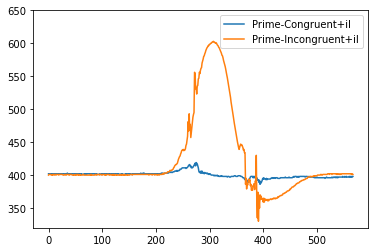

In [6]:
plt.plot(np.arange(len(tool.iI_force_tar["prime_cong"])), tool.iI_force_tar["prime_cong"], label = "Prime-Congruent+iI")
#plt.plot(np.arange(len(tool.cI_force["target"])), tool.iC_force["target"], label = "Prime-Incongruent")
plt.plot(np.arange(len(tool.iI_force_tar["prime_incon"])), tool.iI_force_tar["prime_incon"], label = "Prime-Incongruent+iI")
plt.legend()
plt.ylim([320, 650])
plt.show()

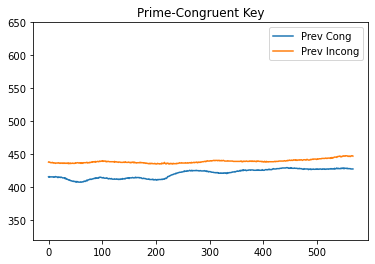

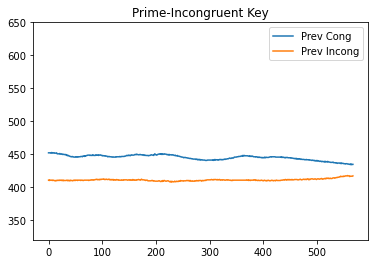

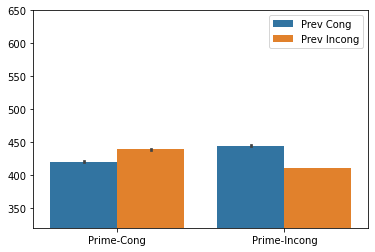

In [7]:
tool.plot_distractorON()

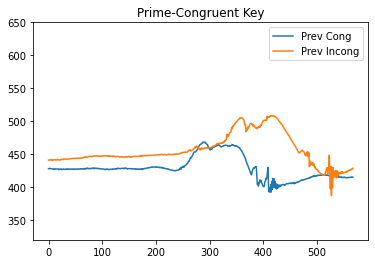

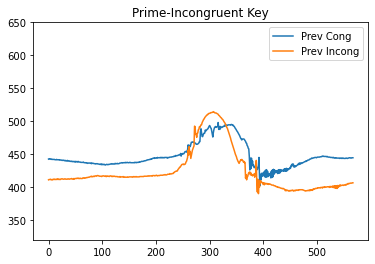

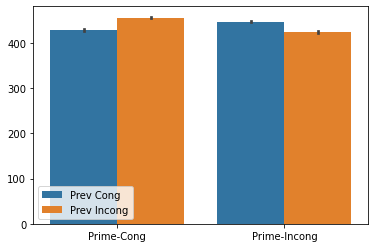

In [8]:
tool.plot_targetON()